# Etudiants : 
# GUICHENITI Hamoud
# SIDI YAHYA Mohamed Ali 
# ZEMALACHE ilyes 

# Loading Data



In [0]:
import tensorflow as tf 
from sklearn.decomposition import PCA 
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.metrics.cluster import adjusted_rand_score as ari
import warnings
warnings.filterwarnings('ignore')

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[1])/255    # 60000 X 784
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[1])/255         # 10000 X 784

In [0]:
data =np.concatenate((x_train,x_test))   # 70000 X 784
target=np.concatenate((y_train,y_test))  # 70000,

In [0]:
# Simple fonction pour ploter une image
def plot_image(img):
  img=img*255
  img=img.reshape(28,28)
  plt.imshow(img,cmap="Greys")

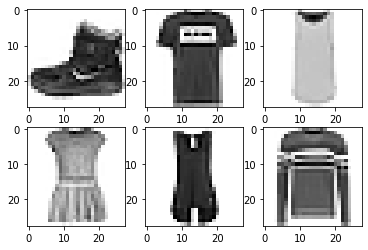

In [6]:
s=230
for i in range(6):
    s=s+1
    plt.subplot(s)
    plot_image(data[i])

# Reduction de dimension pour Fashion-MNIST avec PCA


In [0]:
pca=PCA()
pca_res=pca.fit_transform(data)

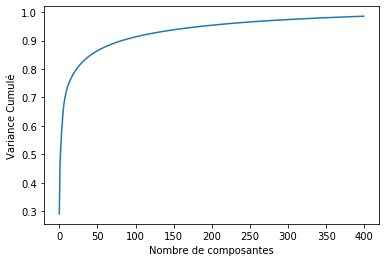

In [8]:
#Exprimer la variance en fonction de nombres de composantes principales
plt.plot(np.cumsum(pca.explained_variance_ratio_[:400]))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance Cumulé');

# 
On remarque que de 0 à 25 composantes principales on a exprimé 80% de la variance de données
de 25 a 400 presque 80-100% 

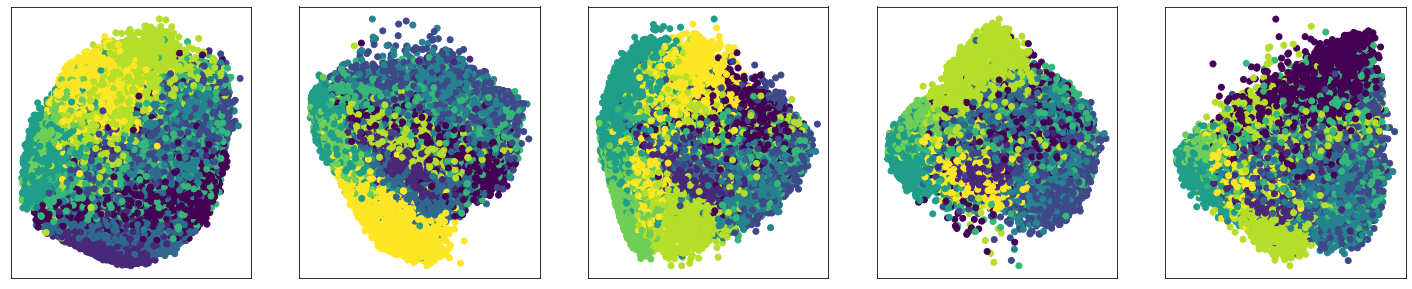

In [9]:
n = 5  # how many digits we will display
plt.figure(figsize=(25,5))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.scatter(pca_res[:, 0], pca_res[:, i+1],c=target)
    ax.get_xaxis().set_visible(False); ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
pca25=PCA(n_components=25)
pca25_res =pca25.fit_transform(data) 

pca100=PCA(n_components=100)
pca100_res =pca100.fit_transform(data) 

In [0]:
def plot_pca_rec(pca,pca_res):
    n = 4  # how many digits we will display
    plt.figure(figsize=(25,5))
    for i in range(n):
       
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i].reshape(28, 28), cmap='Greys')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pca.inverse_transform(pca_res)[i].reshape(28, 28), cmap='Greys')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Affichage PCA avec 80 % de variances : 


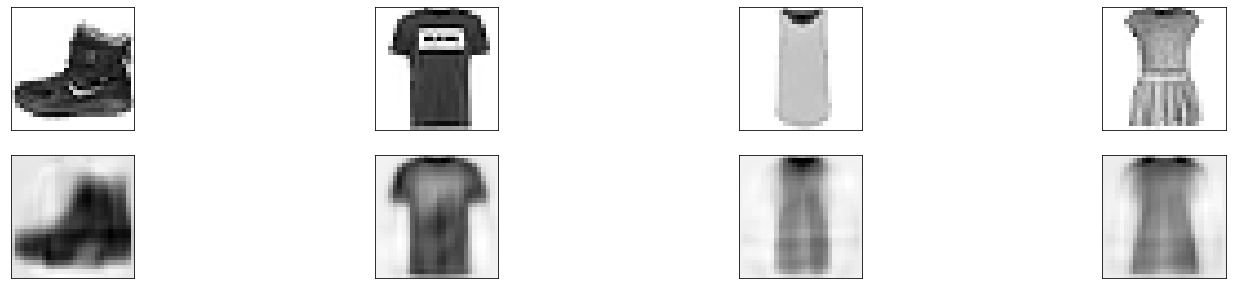

Affichage PCA avec 90 % de variances : 


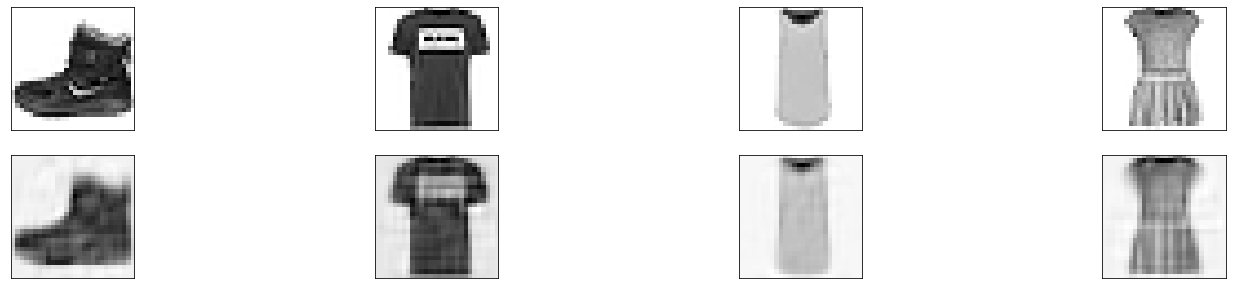

Affichage PCA avec 100 % de variances : 


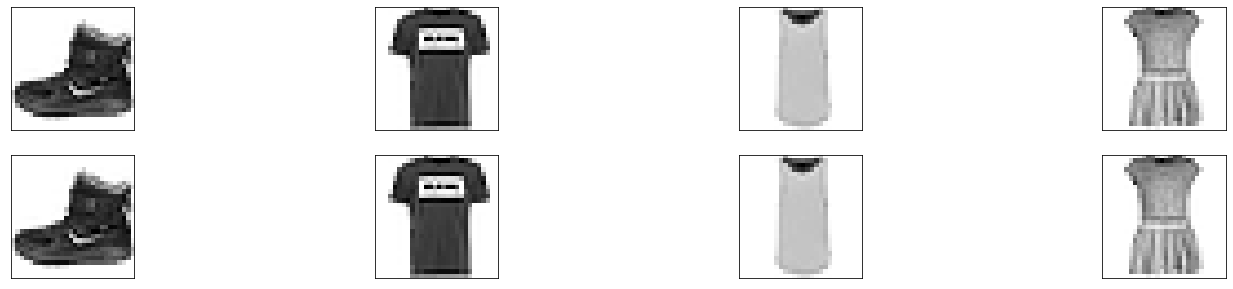

In [12]:
print("Affichage PCA avec 80 % de variances : ")
plot_pca_rec(pca25,pca25_res)
print("Affichage PCA avec 90 % de variances : ")
plot_pca_rec(pca100,pca100_res)
print("Affichage PCA avec 100 % de variances : ")
plot_pca_rec(pca,pca_res)

# Reduction de dimension pour Fashion-MNIST avec t-SNE

T-SNE est très couteuse, pour cela on va appliquer notre étude sur une petite proportion de la data .
La fonction t-SNE prends en compte un certain nombre de paramètres :Le taux d’apprentissage, la perplexité,
l’exageration prématurée, le nombre d’itérations,le nombre
de tentatives en cas de non-amélioration etc.

In [0]:
def plot_results(res):
    n = 5 # how many digits we will display
    plt.figure(figsize=(25,5))
    for i in range(n):
       
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.scatter(res[i][:, 0], res[i][:, 1],c=target[:500])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Ici on va aplliquer 5 learning rate differents, on remarque que ce dernier n'influence pas notre résultat.

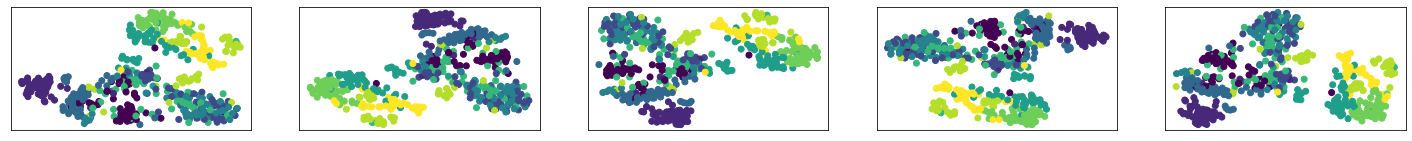

In [14]:
#Learning rate
res=[]
for i in range(5):
    tsne = TSNE(n_components=2,learning_rate=2*(i+1),n_iter=1000)
    tsne_res=tsne_res=tsne.fit_transform(data[:500])
    res.append(tsne_res)
plot_results(res)    

La même chose pour la perplexity, 5 choix differents.
On remarque aussi une meilleur separation en changenant ce paramètre.

Après avoir consulté cet article : 
https://distill.pub/2016/misread-tsne/?fbclid=IwAR1KcfFl_xIGSyEaMcAJxfB-QoFO8dH1ojP5r4pJ-DDfbMTszL_1-IcKA74

On a compris que ce paramêtre est très important

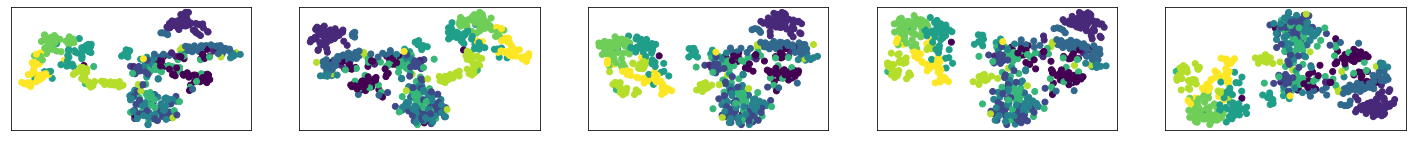

In [15]:
#Perplexity
res=[]
for i in range(5):
    tsne = TSNE(n_components=2,learning_rate=5, verbose=0,perplexity=10*(i+1),n_iter=2000)
    tsne_res=tsne_res=tsne.fit_transform(data[:500])
    res.append(tsne_res)
plot_results(res)

l'Exaggeration avec 5 choix differents.

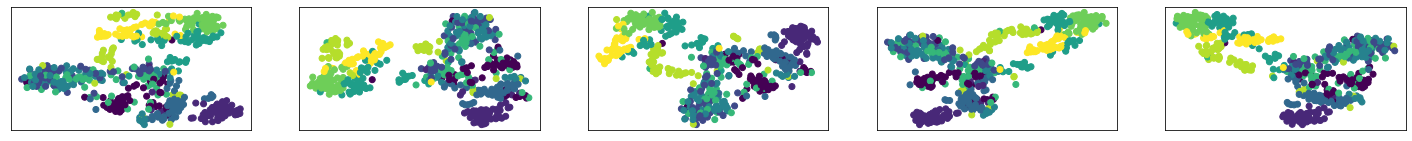

In [16]:
#Exaggeration
res=[]
for i in range(5):
    tsne = TSNE(n_components=2, early_exaggeration=6*(i+1))
    tsne_res=tsne_res=tsne.fit_transform(data[:500])
    res.append(tsne_res)
plot_results(res)

In [0]:
tsne = TSNE(n_components=2, verbose=0,learning_rate=4, perplexity=40, early_exaggeration= 10,n_iter=5000)
tsne_res=tsne.fit_transform(data)

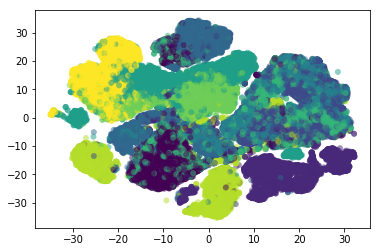

In [0]:
plt.scatter(tsne_res[:, 0], tsne_res[:, 1],c=target+1, edgecolor='none', alpha=0.5)

# AutoEncoder

In [0]:
# Fonction pour evaluer les meilleurs paramêtres à utiliser
def get_erreur(loss_func,optim,x_train,x_test):
        encoding_dim = 32
        input_img = tf.keras.layers.Input(shape=(784,))
        layer=tf.keras.layers.Dense(encoding_dim*16,activation="relu")(input_img)
        layer=tf.keras.layers.Dense(encoding_dim*8,activation="relu")(layer)
        layer=tf.keras.layers.Dense(encoding_dim*4,activation="relu")(layer)
        layer=tf.keras.layers.Dense(encoding_dim*2,activation="relu")(layer)
        layer=tf.keras.layers.Dense(encoding_dim,activation="relu")(layer)
        
        Encoded=tf.keras.layers.Dense(32,activation="relu")(layer)
        
        layer=tf.keras.layers.Dense(encoding_dim*2,activation="relu")(layer)
        layer=tf.keras.layers.Dense(encoding_dim*4,activation="relu")(layer)
        layer=tf.keras.layers.Dense(encoding_dim*8,activation="relu")(layer)
        layer=tf.keras.layers.Dense(encoding_dim*16,activation="relu")(layer)

        Decoded=tf.keras.layers.Dense(784,activation="sigmoid")(layer)
        AutoEncoder=tf.keras.models.Model(input_img,Decoded)
        Encoder=tf.keras.models.Model(input_img,Encoded)
        AutoEncoder.compile(optimizer =optim , loss = loss_func)
        history=AutoEncoder.fit(x_train,x_train,epochs=50,validation_data=(x_test,x_test),batch_size=256,shuffle=True)

        return min(history.history['loss']),history,Encoder,AutoEncoder

loss_function=['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error','mean_squared_logarithmic_error']
Optimiser=['SGD','Adagrad','Adagrad','RMSprop','Adam']

In [0]:
losses=[]
for loss in loss_function:
  e,_,_,_=get_erreur(loss,'Adam',x_train[:1000,:],x_test[:1000,:])
  losses.append(e)
print("La meilleure fonction pour le loss est : ",loss_function[losses.index(min(losses))])

In [0]:
losses=[]
for opti in Optimiser:
  e,_,_,_=get_erreur('mean_squared_logarithmic_error',opti,x_train[:1000,:],x_test[:1000,:])
  losses.append(e)
print("Le meilleur optimizer est : ",Optimiser[losses.index(min(losses))])

In [0]:
encoding_dim = 32

In [19]:
encoding_dim = 32
input_img = tf.keras.layers.Input(shape=(784,))
layer=tf.keras.layers.Dense(encoding_dim*16,activation="relu")(input_img)
layer=tf.keras.layers.Dense(encoding_dim*8,activation="relu")(layer)
layer=tf.keras.layers.Dense(encoding_dim*4,activation="relu")(layer)
layer=tf.keras.layers.Dense(encoding_dim*2,activation="relu")(layer)
layer=tf.keras.layers.Dense(encoding_dim,activation="relu")(layer)

Encoded=tf.keras.layers.Dense(32,activation="relu")(layer)

layer=tf.keras.layers.Dense(encoding_dim*2,activation="relu")(layer)
layer=tf.keras.layers.Dense(encoding_dim*4,activation="relu")(layer)
layer=tf.keras.layers.Dense(encoding_dim*8,activation="relu")(layer)
layer=tf.keras.layers.Dense(encoding_dim*16,activation="relu")(layer)
Decoded=tf.keras.layers.Dense(784,activation="sigmoid")(layer)

AutoEncoder=tf.keras.models.Model(input_img,Decoded)
Encoder=tf.keras.models.Model(input_img,Encoded)
AutoEncoder.compile(optimizer ='Adam' , loss = 'mean_squared_logarithmic_error')
history=AutoEncoder.fit(x_train,x_train,epochs=50,validation_data=(x_test,x_test),batch_size=256,shuffle=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0259 - val_loss: 0.0138
Epoch 2/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0118 - val_loss: 0.0105
Epoch 3/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0100 - val_loss: 0.0096
Epoch 4/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0091 - val_loss: 0.0087
Epoch 5/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0085 - val_loss: 0.0083
Epoch 6/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0080 - val_loss: 0.0079
Epoch 7/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0077 - val_loss: 0.0076
Epoch 8/50
60000/60000 [==

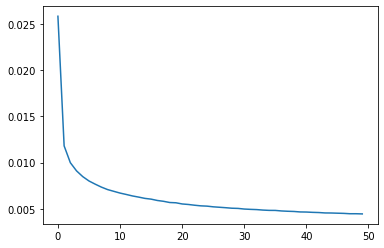

In [20]:
plt.plot(history.history['loss'])

In [0]:
x_test_encoded=AutoEncoder.predict(x_test)

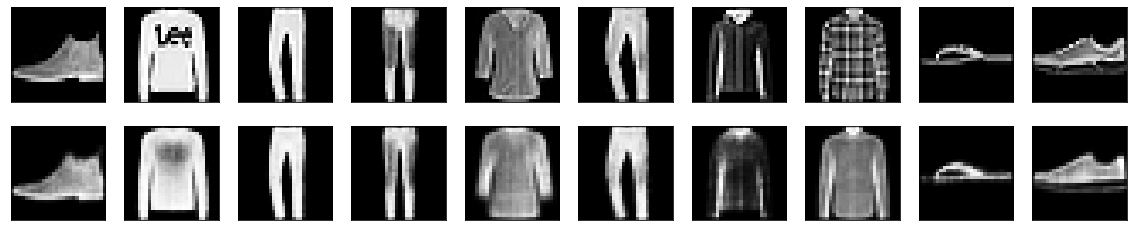

In [22]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_encoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
encoded_images = Encoder.predict(data)

# Convontional Autoencoder ( Bonus )

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Encooder2=Model(input_img, encoded)
autoencoder2 = Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [0]:
x_train1 = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test1 = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [53]:
history2=autoencoder2.fit(x_train1,x_train1,epochs=50,
               validation_data=(x_test1,x_test1),
               batch_size=256,shuffle=True)




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 7s 116us/step - loss: 0.0322 - val_loss: 0.0145
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0125 - val_loss: 0.0114
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0109 - val_loss: 0.0105
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0103 - val_loss: 0.0101
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0095 - val_loss: 0.0093
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0092 - val_loss: 0.0091
Epoch 8/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0088 - val_loss: 0.0

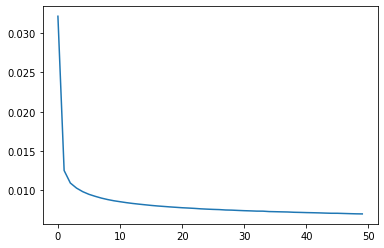

In [54]:
plt.plot(history2.history['loss'])

In [0]:
x_test_encoded2=autoencoder2.predict(x_test1)

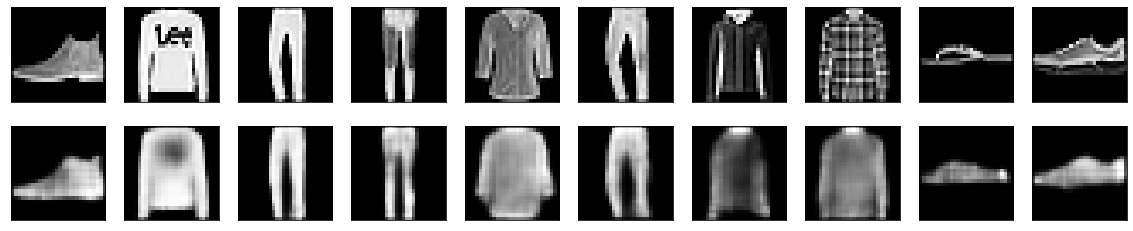

In [56]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_encoded2[i].reshape(28, 28)*255)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Kmeans et Evaluation NMI/ARI

In [0]:
kmeans=KMeans(n_clusters=10,random_state=0).fit(data)   # DATA 
kmeans1=KMeans(n_clusters=10,random_state=0).fit(encoded_images) ## AE
kmeans2=KMeans(n_clusters=10,random_state=0).fit(pca25_res)  # PCA 25 Composantes
kmeans3=KMeans(n_clusters=10,random_state=0).fit(pca100_res)  # PCA 100 Composantes
kmeans4=KMeans(n_clusters=10,random_state=0).fit(tsne_res)  # TSNE 2 composantes

On remarque selon les deux metrics NMI/ARI,
TSNE est le meilleur pour l'instant, voyons voir le résultat de T-SNE sur les images encodés

In [69]:
print("Evaluation pour la data complète : NMI ==> {0:.2f}, ARI ==> {1:.2f} ".format(nmi(target,kmeans.labels_),ari(target,kmeans.labels_)))
print("Evaluation du résultat de l'AE   : NMI ==> {0:.2f}, ARI ==> {1:.2f} ".format(nmi(target,kmeans1.labels_),ari(target,kmeans1.labels_)))
print("Evaluation du résultat de PCA25  : NMI ==> {0:.2f}, ARI ==> {1:.2f} ".format(nmi(target,kmeans2.labels_),ari(target,kmeans2.labels_)))
print("Evaluation du résultat de PCA100 : NMI ==> {0:.2f}, ARI ==> {1:.2f} ".format(nmi(target,kmeans3.labels_),ari(target,kmeans3.labels_)))
print("Evaluation du résultat de TSNE   : NMI ==> {0:.2f},ARI ==> {1:.2f} ".format(nmi(target,kmeans4.labels_),ari(target,kmeans4.labels_)))

Evaluation pour la data complète : NMI ==> 0.51, ARI ==> 0.35 
Evaluation du résultat de l'AE   : NMI ==> 0.35, ARI ==> 0.16 
Evaluation du résultat de PCA25  : NMI ==> 0.53, ARI ==> 0.38 
Evaluation du résultat de PCA100 : NMI ==> 0.51, ARI ==> 0.35 
Evaluation du résultat de TSNE :   NMI ==> 0.55, ARI ==> 0.45


In [0]:
tsne_res_encoded=tsne.fit_transform(encoded_images)

In [25]:
kmeans5=KMeans(n_clusters=10,random_state=0).fit(tsne_res_encoded)  # TSNE sur encoded
print("Evaluation du résultat de TSNE_Encoded  : NMI ==> {0:.2f},ARI ==> {1:.2f} ".format(nmi(target,kmeans5.labels_),ari(target,kmeans5.labels_)))

Evaluation du résultat de TSNE_Encoded  : NMI ==> 0.45,ARI ==> 0.30 


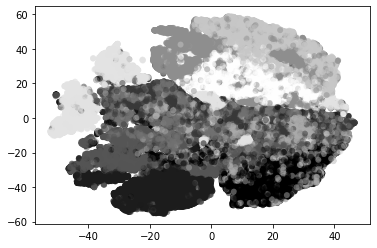

In [26]:
plt.scatter(tsne_res_encoded[:, 0], tsne_res_encoded[:, 1],c=target+1, edgecolor='none', alpha=0.5)

#Conclusion : 
Le meilleur résultat selon notre étude, est TSNE, mais sachant que cette derniere prends des heures pour donner résultat, on va préferer les résultats de PCA25 vu que son exécution est très rapide, en plus il garde autant d'informations que TSNE ou presque.
Cependant pour la visualisation, TSNE remporte le challenge.